**PS1: Discrete Planning**

Planning Algorithms in AI

Kashirin Aleksandr

Skoltech 2021

**Task 1: Configuration Space**

In [2]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
import utils
import scipy as sp

# Control flags
labelsize = 14
titlesize = 16
suptitlesize = 18

**A: Visualize from the given data the workspace and the different rod configurations for each discretized
orientation. Comment on the given discretized values for orientation.**

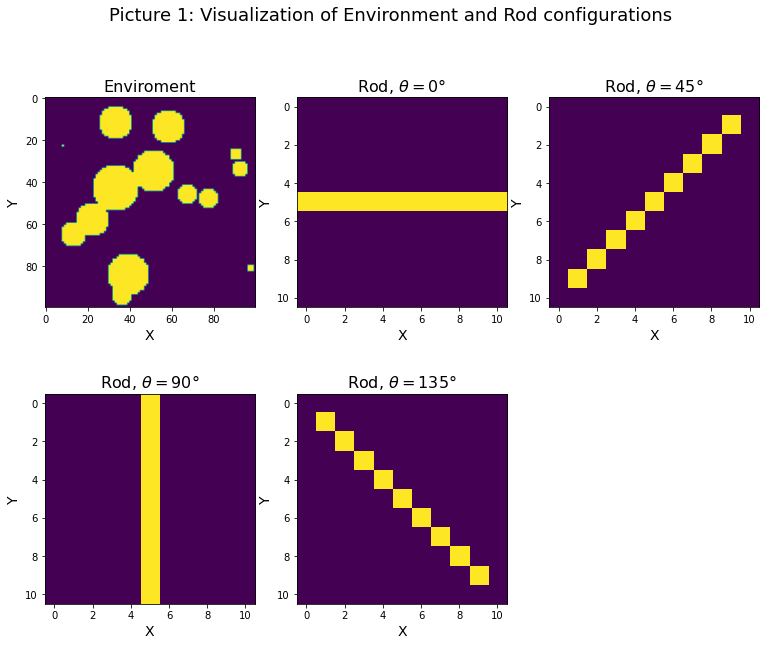

In [3]:
# Load the data
environment = np.load('data_ps1.npz')['environment']
rod =  np.load('data_ps1.npz')['rod']

# Define figure properties and suptitle
plt.figure(figsize=[6.4*2, 5*2])
plt.suptitle('Picture 1: Visualization of Environment and Rod configurations', fontsize=suptitlesize)

# Plot the enviroment
plt.subplot(2, 3, 1)
plt.imshow(environment)
plt.title('Enviroment', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Plot the possible positions of the rod
# Theta = 0
plt.subplot(2, 3, 2)
plt.imshow(rod[:, :, 0])
plt.title(r'Rod, $\theta = 0 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Theta = 45
plt.subplot(2, 3, 3)
plt.imshow(rod[:, :, 1])
plt.title(r'Rod, $\theta = 45 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Theta = 90
plt.subplot(2, 3, 4)
plt.imshow(rod[:, :, 2])
plt.title(r'Rod, $\theta = 90 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Theta = 135
plt.subplot(2, 3, 5)
plt.imshow(rod[:, :, 3])
plt.title(r'Rod, $\theta = 135 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

plt.show()

**B: Visualize the environment together with the object.**

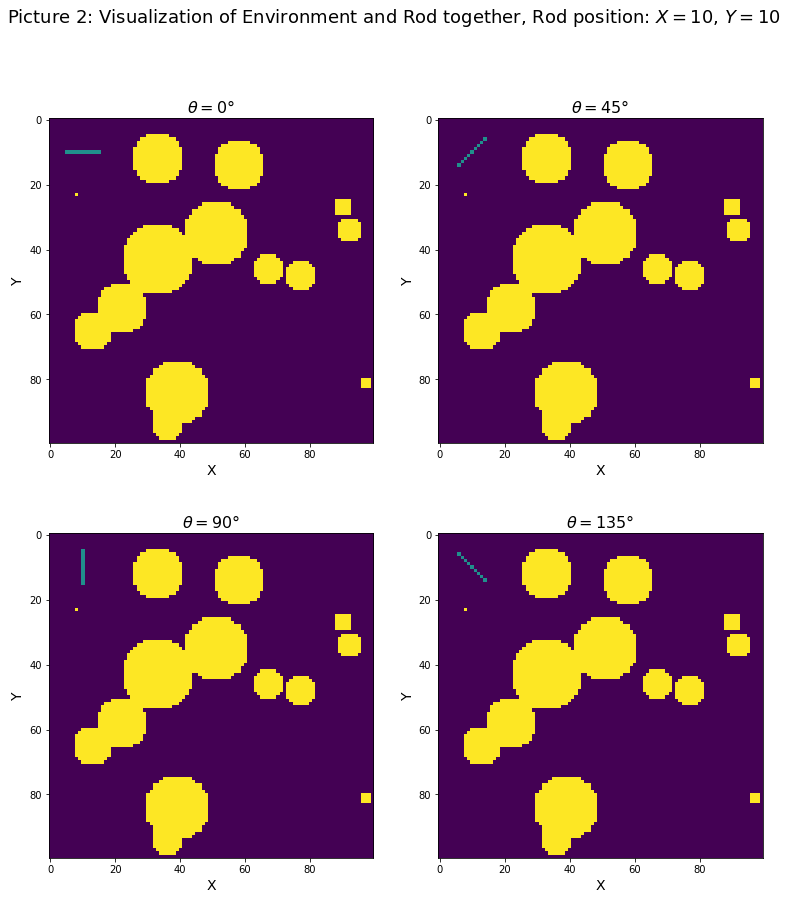

In [5]:
# Initial pose conditions
x = 10
y = 10
th = [0, 1, 2, 3]

# Get the map
pos0 = utils.plot_enviroment(environment, rod, [x, y, th[0]])
pos1 = utils.plot_enviroment(environment, rod, [x, y, th[1]])
pos2 = utils.plot_enviroment(environment, rod, [x, y, th[2]])
pos3 = utils.plot_enviroment(environment, rod, [x, y, th[3]])

# Define figure properties and suptitle
plt.figure(figsize=[6.4*2, 7*2])
plt.suptitle(f'Picture 2: Visualization of Environment and Rod together, Rod position: $X=${x}, $Y=${y}', fontsize=suptitlesize)

# Plot the possible positions of the rod
# Theta = 0
plt.subplot(2, 2, 1)
plt.imshow(pos0)
plt.title(r'$\theta = 0 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Theta = 45
plt.subplot(2, 2, 2)
plt.imshow(pos1)
plt.title(r'$\theta = 45 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Theta = 90
plt.subplot(2, 2, 3)
plt.imshow(pos2)
plt.title(r'$\theta = 90 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Theta = 135
plt.subplot(2, 2, 4)
plt.imshow(pos3)
plt.title(r'$\theta = 135 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

plt.show()

**C: Create the C-space for the 2D environment map. For this, plot all the images corresponding to each
of the orientations by using collision checking.**

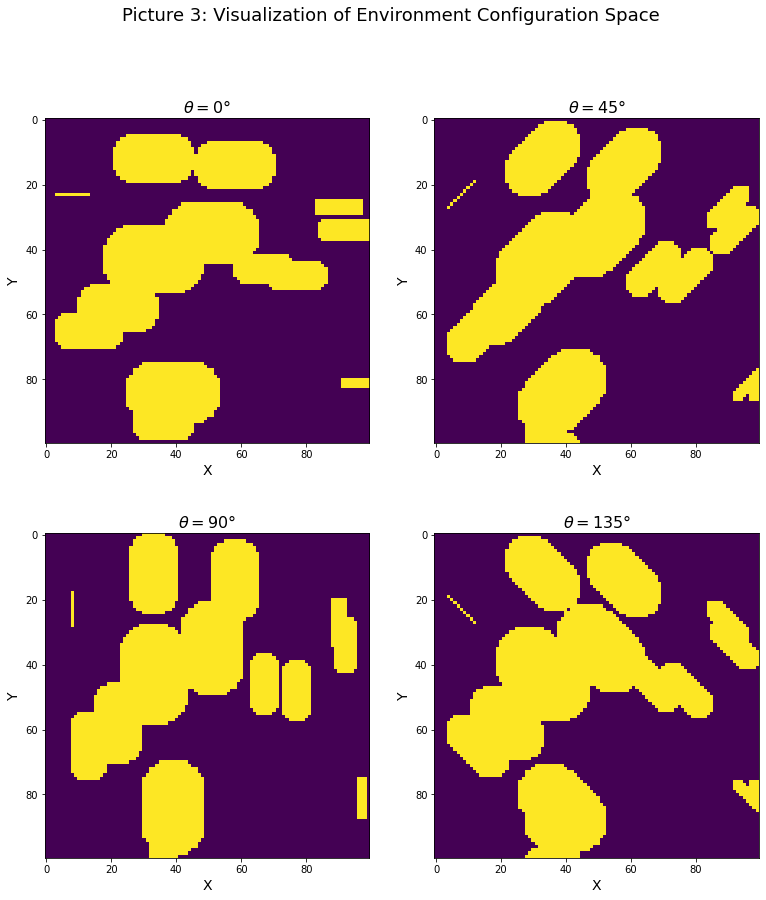

In [6]:
# Get the maps
conf0 = sp.signal.convolve2d(environment, rod[:, :, 0], boundary='symm', mode='same')
conf1 = sp.signal.convolve2d(environment, rod[:, :, 1], boundary='symm', mode='same')
conf2 = sp.signal.convolve2d(environment, rod[:, :, 2], boundary='symm', mode='same')
conf3 = sp.signal.convolve2d(environment, rod[:, :, 3], boundary='symm', mode='same')

# Normalization of images
norm_conf0 = utils.normalize_image(conf0)
norm_conf1 = utils.normalize_image(conf1)
norm_conf2 = utils.normalize_image(conf2)
norm_conf3 = utils.normalize_image(conf3)

# Define figure properties and suptitle
plt.figure(figsize=[6.4*2, 7*2])
plt.suptitle('Picture 3: Visualization of Environment Configuration Space', fontsize=suptitlesize)

# Theta = 0
plt.subplot(2, 2, 1)
plt.imshow(norm_conf0)
plt.title(r'$\theta = 0 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Theta = 45
plt.subplot(2, 2, 2)
plt.imshow(norm_conf1)
plt.title(r'$\theta = 45 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Theta = 90
plt.subplot(2, 2, 3)
plt.imshow(norm_conf2)
plt.title(r'$\theta = 90 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

# Theta = 135
plt.subplot(2, 2, 4)
plt.imshow(norm_conf3)
plt.title(r'$\theta = 135 \degree$', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

plt.show()



**D: Comment on the obtained C-space with the previous method. What is the size of the C-space?**

**Answer:** The size of the configuration space is $[x, y, \theta]$ which is 3-dimensional configuration space and angle theta is discretized among four possible configurations.

**Task 2: A-star Algorithm**

For this task, you will implement a graph search algorithm. The actions allowed in this problem are moving up,
down, left, right, rotate right, rotate left. In total 6 actions, each of them has an assigned a cost of 1.

**A: You need to implement the A star algorithm and plan in the generated discrete C-space from the
previous task. The starting configuration of the agent is (6,6,2) and the goal configuration is (55,55,0). On
this first iteration, use an heuristic function h(q; qG) = 0, which is equivalent to the Dijkstra algorithm.**

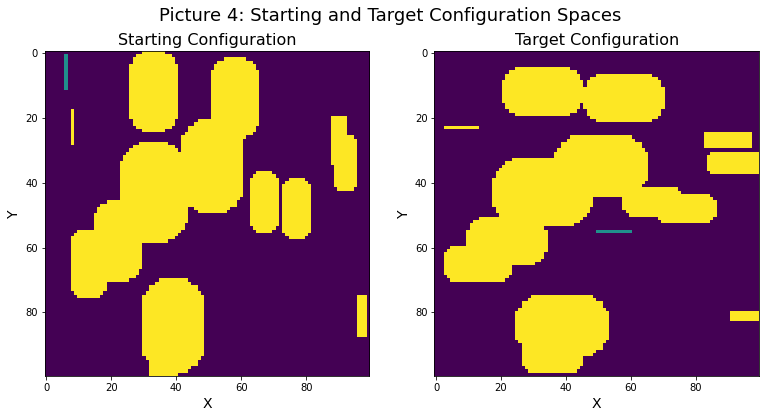

In [7]:
# Point the starting position of the rod and the target position
start_config = utils.plot_enviroment(norm_conf2, rod, [6, 6, 2])
target_config = utils.plot_enviroment(norm_conf0, rod, [55, 55, 0])

# Plot the starting configuration ans the target one
plt.figure(figsize=[6.4*2, 6])
plt.suptitle('Picture 4: Starting and Target Configuration Spaces', fontsize=suptitlesize)

plt.subplot(1, 2, 1)
plt.imshow(start_config)
plt.title('Starting Configuration', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

plt.subplot(1, 2, 2)
plt.imshow(target_config)
plt.title('Target Configuration', fontsize=titlesize)
plt.xlabel('X', fontsize=labelsize)
plt.ylabel('Y', fontsize=labelsize)

plt.show()

In [8]:
# Import libraries
from queue import PriorityQueue
from collections import namedtuple

# Define function to change the angle
def change_angle(pos):
    """
    Change the angle of the configuration space,
    if point out of boundaries:
    3 -> 0
    0 -> 3
    """
    if (pos[2] > 3):
        pos[2] = 0
    elif (pos[2] < 0):
        pos[2] = 3
    return pos

# Define function to check if we are in boundaries
def check_boundaries(pos):
    """
    Check if the object is placed inside environment.
    Take into account object size (-5 each side).
    """
    if (pos[0] > 5) and (pos[0] < 95) and (pos[1] > 5) and pos[1] < 95:
        return True
    else:
        return False

# Define function to check obstacle
def check_obstacle(pos, configuration_space):
    """ 
    Check if the object intersects with
    obstacle in the current configuration.
    """
    # Set current config space depend on the theta angle of the rod
    current_config_space = configuration_space[:, :, pos[2]]
    # Assign current X position
    cur_X = pos[0]
    # Assign current Y position
    cur_Y = pos[1]
    # Check if current position is not in obstacle
    if current_config_space[cur_X, cur_Y] == 1:
        return False
    else:
        return True

# Initial conditions
configuration_space = np.stack((norm_conf0, norm_conf1, norm_conf2, norm_conf3), axis=2)
start = np.array((6, 6, 2))
target = np.array((55, 55, 0))

# Define return object
DijkstraReturn = namedtuple('DijkstraReturn', ('plan','plan_length','visited_nodes', 'final_cost'))

# Define Dijsktra algorithm
def find_path_dijkstra(start, target, configuration_space):
    """ Find a path with a dijkstra algorithm

    Args:
        start - starting position [x, y, theta]
        target - target position [x, y, theta]
        configuration_space - configuration space consists of discretized variety of configurations
    
    Returns:
        plan - pathway to the target point
        plan_length - pathway length
        visited_nodes - amount of visited nodes
    """
    # Initialize priority queue
    Q = PriorityQueue()
    # Initialize cost list
    C = np.zeros((100, 100, 4))
    # Initialize possible actions
    U = {'up':np.array((0, -1, 0)), 
        'down':np.array((0, 1, 0)), 
        'right':np.array((1, 0, 0)), 
        'left':np.array((-1, 0, 0)),
        'rotate_right':np.array((0, 0, -1)),
        'rotate_left':np.array((0, 0, 1))
    }
    # Assign cost for the starting node
    C[tuple(start)] = 0
    # Put starting position and assign a cost
    Q.put((C[tuple(start)], tuple(start)))
    # Action cost
    action_cost = 1
    # Initialize array of visited points
    visited = np.zeros((100, 100, 4))
    # Initialize parent table
    parent_table = dict()
    # Initialize plan
    plan = 0
    while not Q.empty():
        X = Q.get()[1]             # X - current position in configuration space
        if X == tuple(target):     # If the current position satisfies the target position
            flag = True            # Raise the flag to show the message
            break                  # Exit the cycle
        for action, coordinate in U.items():      # For each possible action in dictionary U
                X_dot =  X + coordinate           # Tranform the position to new coordinate in configuration space, X_dot - new state in the configuration space
                if (X_dot[2] > 3) or (X_dot[2] < 0):    # If angle is out of boundaries
                    X_dot = change_angle(X_dot)         # Function to change the angle
                if check_boundaries(X_dot) and check_obstacle(X_dot, configuration_space):  # Checking the obstacle and borders
                    if visited[tuple(X_dot)] == 0:      # If node was not visited
                        visited[tuple(X_dot)] = 1       # Mark it as visited
                        parent_table[tuple(X_dot)] = tuple(X)         # Put in the parent table next node and assigned it with the current
                        C[tuple(X_dot)] = C[tuple(X)] + action_cost   # We are moving on the map by 1 pixel, hence we take into account only action cost and do not take weights of edges
                        Q.put((C[tuple(X_dot)], tuple(X_dot)))        # Put this node into queue and prioritize it by it's cost
                    else:       # If node was visited
                        current_cost = C[tuple(X)] + action_cost     # Calculate current cost
                        if current_cost < C[tuple(X_dot)]:               # If current cost is less than found before
                            C[tuple(X_dot)] = current_cost               # Than update the cost to this node, else do nothing
                            parent_table[tuple(X_dot)] = tuple(X)        # Put in the parent table next node and assigned it with the current
    if flag:
        print('------------------------')
        print('Dijkstra status: Success')

        # Get the amount of visited nodes
        visited_nodes = len(parent_table)
        print('Amount of visited nodes: ', visited_nodes)

        # Get the plan 
        parent = parent_table[tuple(target)]    # Assign first parent
        plan = [tuple(target), parent]          # Create a list object that stores pathway plan
        while parent != tuple(start):           # Until we didn't reach starting point
            if parent == tuple(start):          # If we reached than break
                break
            plan.append(parent_table[parent])   # Append parent node for each next node as a new parent
            parent = parent_table[parent]       # Assign new parent
        
        # Reverse the plan: From Start to Target
        plan = plan[::-1]

        # Get the length of the pathway plan
        plan_length = len(plan)
        print('Plan length: ', plan_length)

        # Get the final cost
        final_cost = C[tuple(target)]
        print('Final cost: ', final_cost)
        print('------------------------')
    else:
        print('Dijkstra status: Failure')

    return DijkstraReturn(plan, plan_length, visited_nodes, final_cost)


# Call Dijkstra algorithm
dijkstra = find_path_dijkstra(start, target, configuration_space)

------------------------
Dijkstra status: Success
Amount of visited nodes:  11637
Plan length:  117
Final cost:  116.0
------------------------


**Comment: As we see Dijkstra is capable of searching an optimal path but this algorithm have to visit 11637 states before it reaches optimal solution. Final route cost is 116. Let us see how can we reduce number of visited states using heuristic functions.**

MovieWriter PillowWriter unavailable; using Pillow instead.


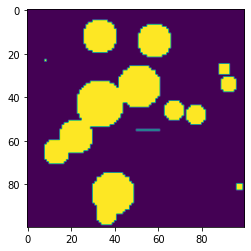

In [9]:
utils.plotting_results(environment, rod, dijkstra.plan)

**B: Change the heuristic function now to be h(q, qG) = L1 norm of the x, y components. Comment on
the changes, how many states have been visited compared to Dijkstra? What is the final cost?**

In [10]:
# Define return object
AstarReturn = namedtuple('AstarReturn', ('plan','plan_length','visited_nodes', 'final_cost'))

# Define A-star algorithm
def find_path_Astar(start, target, configuration_space):
    """ Find a path with A-star algorithm

    Args:
        start - starting position [x, y, theta]
        target - target position [x, y, theta]
        configuration_space - configuration space consists of discretized variety of configurations
    
    Returns:
        plan - pathway to the target point
        plan_length - pathway length
        visited_nodes - amount of visited nodes
    """
    # Initialize priority queue
    Q = PriorityQueue()
    # Initialize cost list
    C = np.zeros((100, 100, 4))
    # Initialize possible actions
    U = {'up':np.array((0, -1, 0)), 
        'down':np.array((0, 1, 0)), 
        'right':np.array((1, 0, 0)), 
        'left':np.array((-1, 0, 0)),
        'rotate_right':np.array((0, 0, -1)),
        'rotate_left':np.array((0, 0, 1))
    }
    # Assign cost for the starting node
    C[tuple(start)] = 0
    C[tuple(target)] = 200
    # Put starting position and assign a cost
    Q.put((C[tuple(start)], tuple(start)))
    # Action cost
    action_cost = 1
    # Initialize array of visited points
    visited = np.zeros((100, 100, 4))
    # Initialize parent table
    parent_table = dict()
    # Initialize plan
    plan = 0
    while not Q.empty():
        X = Q.get()[1]             # X - current position in configuration space
        if X == tuple(target):     # If the current position satisfies the target position
            flag = True            # Raise the flag to show the message
            break                  # Exit the cycle
        for action, coordinate in U.items():      # For each possible action in dictionary U
                X_dot =  X + coordinate           # Tranform the position to new coordinate in configuration space, X_dot - new state in the configuration space
                if (X_dot[2] > 3) or (X_dot[2] < 0):    # If angle is out of boundaries
                    X_dot = change_angle(X_dot)         # Function to change the angle
                if check_boundaries(X_dot) and check_obstacle(X_dot, configuration_space):  # Checking the obstacle and borders
                    if visited[tuple(X_dot)] == 0:      # If node was not visited
                        visited[tuple(X_dot)] = 1       # Mark it as visited
                        parent_table[tuple(X_dot)] = tuple(X)             # Put in the parent table next node and assigned it with the current
                        C[tuple(X_dot)] = C[tuple(X)] + action_cost       # We are moving on the map by 1 pixel, hence we take into account only action cost and do not take weights of edges
                        H = np.abs(X_dot[0] - target[0]) + np.abs(X_dot[1] - target[1]) #+ np.abs(X_dot[2] - target[2])  # Calculate Manhattan Distance
                        Q.put((C[tuple(X_dot)] + H, tuple(X_dot)))            # Put this node into queue and prioritize it by it's cost
                    else:       # If node was visited
                        current_cost = C[tuple(X)] + action_cost         # Calculate current cost
                        if current_cost < min(C[tuple(X_dot)], C[tuple(target)]):               # If current cost is less than found before
                            C[tuple(X_dot)] = current_cost               # Than update the cost to this node, else do nothing
                            parent_table[tuple(X_dot)] = tuple(X)        # Put in the parent table next node and assigned it with the current
    if flag:
        print('------------------------')
        print('A-star status: Success')

        # Get the amount of visited nodes
        visited_nodes = len(parent_table)
        print('Amount of visited nodes: ', visited_nodes)

        # Get the plan 
        parent = parent_table[tuple(target)]    # Assign first parent
        plan = [tuple(target), parent]          # Create a list object that stores pathway plan
        while parent != tuple(start):           # Until we didn't reach starting point
            if parent == tuple(start):          # If we reached than break
                break
            plan.append(parent_table[parent])   # Append parent node for each next node as a new parent
            parent = parent_table[parent]       # Assign new parent
        
        # Reverse the plan: From Start to Target
        plan = plan[::-1]

        # Get the length of the pathway plan
        plan_length = len(plan)
        print('Plan length: ', plan_length)

        # Get the final cost
        final_cost = C[tuple(target)]
        print('Final cost: ', final_cost)
        print('------------------------')
    else:
        print('A-star status: Failure')

    return AstarReturn(plan, plan_length, visited_nodes, final_cost)


# Call A-star algorithm
a_star = find_path_Astar(start, target, configuration_space)

------------------------
A-star status: Success
Amount of visited nodes:  4486
Plan length:  117
Final cost:  116.0
------------------------


**Comment: As we see A-star algorithm significantly reduces amount of visited states and hence we optimize a lot path planning algorithm.**

MovieWriter PillowWriter unavailable; using Pillow instead.


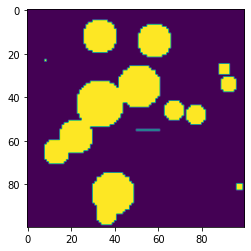

In [11]:
utils.plotting_results(environment, rod, a_star.plan)

**C: Propose an heuristic function $h(q, q_G)$ that includes orientation. Compare metrics with the previous
results. Comment on the results**

Proposal: $h(q, q_G) = |\theta_{X} - \theta_{X_G}|$ - is a part of heuristic function that is responsible for the angle theta.

In [12]:
# Define return object
AstarReturn = namedtuple('AstarReturn', ('plan','plan_length','visited_nodes', 'final_cost'))

# Define A-star algorithm
def find_path_Astar_diff_heuristic(start, target, configuration_space):
    """ Find a path with A-star algorithm

    Args:
        start - starting position [x, y, theta]
        target - target position [x, y, theta]
        configuration_space - configuration space consists of discretized variety of configurations
    
    Returns:
        plan - pathway to the target point
        plan_length - pathway length
        visited_nodes - amount of visited nodes
    """
    # Initialize priority queue
    Q = PriorityQueue()
    # Initialize cost list
    C = np.zeros((100, 100, 4))
    # Initialize possible actions
    U = {'up':np.array((0, -1, 0)), 
        'down':np.array((0, 1, 0)), 
        'right':np.array((1, 0, 0)), 
        'left':np.array((-1, 0, 0)),
        'rotate_right':np.array((0, 0, -1)),
        'rotate_left':np.array((0, 0, 1))
    }
    # Assign cost for the starting node
    C[tuple(start)] = 0
    C[tuple(target)] = 200
    # Put starting position and assign a cost
    Q.put((C[tuple(start)], tuple(start)))
    # Action cost
    action_cost = 1
    # Initialize array of visited points
    visited = np.zeros((100, 100, 4))
    # Initialize parent table
    parent_table = dict()
    # Initialize plan
    plan = 0
    while not Q.empty():
        X = Q.get()[1]             # X - current position in configuration space
        if X == tuple(target):     # If the current position satisfies the target position
            flag = True            # Raise the flag to show the message
            break                  # Exit the cycle
        for action, coordinate in U.items():      # For each possible action in dictionary U
                X_dot =  X + coordinate           # Tranform the position to new coordinate in configuration space, X_dot - new state in the configuration space
                if (X_dot[2] > 3) or (X_dot[2] < 0):    # If angle is out of boundaries
                    X_dot = change_angle(X_dot)         # Function to change the angle
                if check_boundaries(X_dot) and check_obstacle(X_dot, configuration_space):  # Checking the obstacle and borders
                    if visited[tuple(X_dot)] == 0:      # If node was not visited
                        visited[tuple(X_dot)] = 1       # Mark it as visited
                        parent_table[tuple(X_dot)] = tuple(X)             # Put in the parent table next node and assigned it with the current
                        C[tuple(X_dot)] = C[tuple(X)] + action_cost       # We are moving on the map by 1 pixel, hence we take into account only action cost and do not take weights of edges
                        H = np.abs(X_dot[0] - target[0]) + np.abs(X_dot[1] - target[1]) + np.abs(X_dot[2] - target[2])  # Calculate Manhattan Distance
                        Q.put((C[tuple(X_dot)] + H, tuple(X_dot)))            # Put this node into queue and prioritize it by it's cost
                    else:       # If node was visited
                        current_cost = C[tuple(X)] + action_cost         # Calculate current cost
                        if current_cost < min(C[tuple(X_dot)], C[tuple(target)]):               # If current cost is less than found before
                            C[tuple(X_dot)] = current_cost               # Than update the cost to this node, else do nothing
                            parent_table[tuple(X_dot)] = tuple(X)        # Put in the parent table next node and assigned it with the current
    if flag:
        print('------------------------')
        print('A-star status: Success')

        # Get the amount of visited nodes
        visited_nodes = len(parent_table)
        print('Amount of visited nodes: ', visited_nodes)

        # Get the plan 
        parent = parent_table[tuple(target)]    # Assign first parent
        plan = [tuple(target), parent]          # Create a list object that stores pathway plan
        while parent != tuple(start):           # Until we didn't reach starting point
            if parent == tuple(start):          # If we reached than break
                break
            plan.append(parent_table[parent])   # Append parent node for each next node as a new parent
            parent = parent_table[parent]       # Assign new parent
        
        # Reverse the plan: From Start to Target
        plan = plan[::-1]

        # Get the length of the pathway plan
        plan_length = len(plan)
        print('Plan length: ', plan_length)

        # Get the final cost
        final_cost = C[tuple(target)]
        print('Final cost: ', final_cost)
        print('------------------------')
    else:
        print('A-star status: Failure')

    return AstarReturn(plan, plan_length, visited_nodes, final_cost)


# Call A-star algorithm
a_star_dif_heuristic = find_path_Astar_diff_heuristic(start, target, configuration_space)

------------------------
A-star status: Success
Amount of visited nodes:  4352
Plan length:  117
Final cost:  116.0
------------------------


**Comment: Using proposed heuristic function, we have reduced amount visited states from 4486 to 4352.**

MovieWriter PillowWriter unavailable; using Pillow instead.


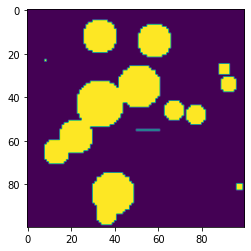

In [13]:
utils.plotting_results(environment, rod, a_star_dif_heuristic.plan)

**Conclusion: Configuration space is an important part of solving path planning problems, because it tells us how does space around an object should be taken into account to avoid collision between obstacles and moving object. To solve discrete planning problems, we can use Dijkstra or A-star algorithms. They take from queue each node with assigned cost and look for a shortest possible path. A-star works better because it takes into account heuristic function such as L1 - Manhattan norm.**